<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/9%EC%9E%A5/%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB는 인터넷 영화 데이터베이스에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해노은 데이터셋이빈다.

텍스트 자체를 신경망에 전달하지는 않고 컴퓨터에서 처리하는 것은 어떤 숫자 데이터다.

이미지는 정수 픽셀값으로 이루어져있어서 합성곱 신경망에서 이미지 다룰 때 특별한 변환을 하지 않는데 텍스트 데이터의 경우 단어를 숫자로 바꾼다. 일반적인 것은 단어마다 고유한 정수를 붙이는 것.


분리된 단어를 하나의 토큰이라하고 하나의 샘플은 여러개의 토큰으로 구성. 하나의 토큰이 하나의 타임스탬프



In [1]:
#토큰에 할당하는 정수 중 몇개는 특정한 용도로 예약이 되어있다.
#0은 패딩 1은 문장의 시작 2는 어휘사전이 없는 토큰

#텐서플로에 이미 정수로 바꾼 데이터를 임포트 하겠음
#자주쓰는500개만 가져오겠다
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target)=imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_input.shape, test_input.shape)

#데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 밸열!
# 넘파이 배열은 정수나 실수 외에도 파이썬 객체를 담을 수 있다.



(25000,) (25000,)


In [3]:
#첫 번쨰 리뷰의 길이 출력
print(len(train_input[0]))

#218개의 토큰으로 이루어져있구나


218


In [4]:
#내용
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20])
#0은 부정 1은 긍정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target=train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
#가장 짧은 리뷰 가장 긴 리뷰 파악해보기
import numpy as np
lengths=np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


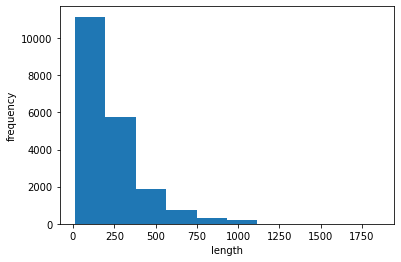

In [10]:
#히스토그램
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
#대부분 짧아서 중간값보다 짧은 100개의 단어만 사용할게요
#이런 리뷰들의 길이를 100에 맞추기위해 패딩을 사용한다.

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input, maxlen=100)

In [12]:
#pad_sequencs()는 기본으로maxlen보다 긴 시퀀스의 앞부분을 자른다. 보통 뒤에 내용이 더 유용하리라 기대하기 때문에
#뒷부분을 자르고싶ㅇ면truncating을 기본값 pre가 아닌 post로 바꾸면된다.


#검증세트도 변환
val_seq=pad_sequences(val_input, maxlen=100)

In [13]:
#순환 신경망 만들기

#가장 간단한 SimpleRNN클래스 사용!!!!

In [15]:
#IMDB는 이진분류임로 마지막 출력층은 한개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야한다.

from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
#이벽차원이 (100,500)
#순환층 당연하게 활성화 함수 사용! 기본값은 tanh(하이퍼볼릭 탄젠트함수)
#(100,500)에서 100은 개수, 500은??
#train_seq vla_seq는 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들어낸다.
#분명 이 정수 사이에는 어떠 ㄴ관련이 없는데도
#정수값의 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법은 원핫인코딩


#imdb.load_data()에서 500개만 사용하기로 지정해서 고유한 단어느 모두 400개임. 훈련데이터에 포함될 수 있는 정수값은 0에서 499
#따라서 이 범위를 원핫인코딩으로 표현하려면 배열의 길이가 500이어야한다.



In [16]:
#원핫인코딩을 위한 유틸리티
train_oh=keras.utils.to_categorical(train_seq)

In [17]:
print(train_oh.shape)
#정수하나마다 500차원의 배배열로 변경
#(20000,100)->(20000,100,500)

(20000, 100, 500)


In [20]:
val_oh=keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

#SimpleRNN에 전달할 샘플의 크기는(100,500)이지만 순환층은 마지막 타임스텝의 은닉상태만 출력한다. 따라서 출력크기가 순환층의 뉴런 개수와 동일한 8이 된다.
#순환층에 사용된 모델 파라미터 개수를 게산해보면 입력토큰은 500차원의 원핫인코딩배열
#이 배열이 순환층의 뉴런 8개와 완전 연결되므로 총 500*8=4000개의 가중치가 있음. 
#순환층의 은닉상태는 다시 다음 타임스탭에 사용되므로 또 다른 가중치와 곱해진ㄷ
#이 ㄴ은닉상태도 순환층의 뉴런과 완전히 연결되므로 8(은닉상태크기)*8(뉴런개수)=64개의 가중치가 필요
#뉴런마다 하나의 절편도 있으므로 모두 4000+64+8=4072개의 모델 파라미터가 필요하다


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [26]:
#순환신경망 훈련

#학습률을 0.0001로 지정했음

rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 39ms/step - loss: 0.6984 - accuracy: 0.4976 - val_loss: 0.6949 - val_accuracy: 0.5028
Epoch 2/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6943 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.5036
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6926 - accuracy: 0.5124 - val_loss: 0.6921 - val_accuracy: 0.5136
Epoch 4/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6913 - accuracy: 0.5214 - val_loss: 0.6913 - val_accuracy: 0.5188
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6900 - accuracy: 0.5342 - val_loss: 0.6902 - val_accuracy: 0.5278
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6886 - accuracy: 0.5425 - val_loss: 0.6893 - val_accuracy: 0.5346
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6870 - accuracy: 0.5488 - val_loss: 0.6885 - val_ac

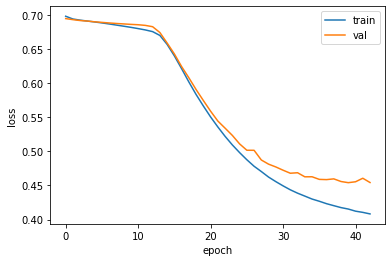

In [28]:
#훈련손실과 검증손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()

In [ ]:
#원핫 인코딩의 단점은 입력데이터가 엄청 커진다는 것!

In [29]:
#순환신경망에서 텍스트처리할떄 즐겨 사용하는 방식ㅇ이 단어임베딩
#각 단어를 고정된 크기의 실수벡터로 바꾸어주는 것

#단어임베딩의 장점은 입력으로 정수데이터 받는다는 것이고 메모리를 훨씬 효율적으로 사용할 수 있따.
#훨씬 작은 크기로도 단어를 잘 표현할 수 있음
#(100,)->(100,20)

In [30]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

#임베딩에서 500은 어휘사전의 크기 16은 임베딩 벡터의 크기 세번쨰는입력 시퀀스의 길이

In [31]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [32]:
#모델 
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 13s 38ms/step - loss: 0.4127 - accuracy: 0.8220 - val_loss: 0.4544 - val_accuracy: 0.7904
Epoch 2/100
313/313 [==============================] - 11s 37ms/step - loss: 0.4102 - accuracy: 0.8230 - val_loss: 0.4548 - val_accuracy: 0.7892
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.4078 - accuracy: 0.8235 - val_loss: 0.4623 - val_accuracy: 0.7888
Epoch 4/100
313/313 [==============================] - 12s 37ms/step - loss: 0.4065 - accuracy: 0.8238 - val_loss: 0.4534 - val_accuracy: 0.7936
Epoch 5/100
313/313 [==============================] - 11s 37ms/step - loss: 0.4040 - accuracy: 0.8273 - val_loss: 0.4550 - val_accuracy: 0.7894
Epoch 6/100
313/313 [==============================] - 11s 37ms/step - loss: 0.4024 - accuracy: 0.8248 - val_loss: 0.4529 - val_accuracy: 0.7940
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.4008 - accuracy: 0.8271 - val_loss: 0.4540 - val_ac

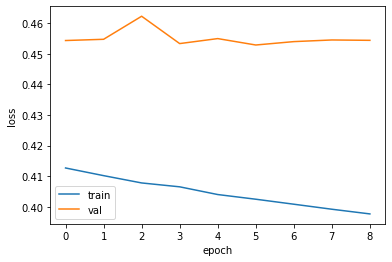

In [33]:
#훈련손실과 검증손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()